## Múltiplicação de Matrizes

* Docente: Arthur Craveiro.
* Email: arthur.craveiro@gmail.com
* Sala: 1A-57.

* Disciplina: Algoritmos I / GA-026.
* Professor: Roberto P. Souto.

In [10]:
import sys
import time
import matplotlib.pyplot as plt
import random

In [11]:
maximo_int = int(1e9+7)

def OrdemMultiplicacaoMatriz(p, n):
    # Inicializa a matriz 'm' com 0's para armazenar os custos mínimos
    m = [[0 for x in range(n)] for x in range(n)]

    # m[i][j] representa o custo mínimo de multiplicação das matrizes da cadeia de i até j
    # O custo é zero quando multiplicamos uma única matriz
    for i in range(1, n):
        m[i][i] = 0

    # 'L' representa o comprimento da cadeia de matrizes
    for L in range(2, n):
        for i in range(1, n - L + 1):
            j = i + L - 1
            m[i][j] = maximo_int
            for k in range(i, j):
                custo = m[i][k] + m[k + 1][j] + p[i - 1] * p[k] * p[j]
                if custo < m[i][j]:
                    m[i][j] = custo

    return m[1][n - 1]

arr = [1, 2, 3, 4]
tamanho = len(arr)

print("Número mínimo de multiplicações é " + str(OrdemMultiplicacaoMatriz(arr, tamanho)))

Número mínimo de multiplicações é 18


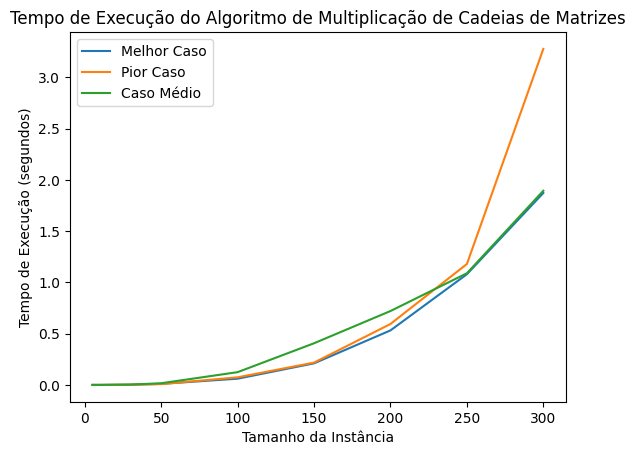

In [15]:
def gerar_instancia(tamanho, tipo):
    if tipo == 'Melhor Caso':
        return [2 for _ in range(tamanho)]
    elif tipo == 'Pior Caso':
        return [100 if i % 2 == 0 else 99 for i in range(tamanho)]
    else:
        return [random.randint(1, 100) for _ in range(tamanho)]

def medir_tempo(funcao, p):
    inicio = time.time()
    funcao(p, len(p))
    fim = time.time()
    return fim - inicio

tamanhos = [5, 10, 30, 50, 100, 150, 200, 250, 300]
tipos = ['Melhor Caso', 'Pior Caso', 'Caso Médio']
resultados = {tipo: [] for tipo in tipos}

for tipo in tipos:
    for tamanho in tamanhos:
        instancia = gerar_instancia(tamanho, tipo)
        tempo = medir_tempo(OrdemMultiplicacaoMatriz, instancia)
        resultados[tipo].append(tempo)

for tipo, tempos in resultados.items():
    plt.plot(tamanhos, tempos, label=tipo)

plt.xlabel('Tamanho da Instância')
plt.ylabel('Tempo de Execução (segundos)')
plt.title('Tempo de Execução do Algoritmo de Multiplicação de Cadeias de Matrizes')
plt.legend()
plt.show()